In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
#import pandas_profiling
import datasist as ds                            #For data cleaning
from statsmodels.stats.outliers_influence import variance_inflation_factor  #multicollinearity
print('pandas version:',pd.__version__)
import pickle
# Show plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',150)
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)




pandas version: 0.24.2


# Loading data

In [3]:
#Load data
raw_data = pd.read_csv('au_train.csv')
raw_data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [4]:
# Clean up column names
raw_data = raw_data.rename(columns=lambda x:x.lower().replace('-','_'))

# The column name "Class" is a key word in python so it needs to be renamed
raw_data.columns = raw_data.columns.str.replace('class', 'salary_class')



# 1.0 Description/Overview of the data

In [5]:
# View data and basic statistics of the data
ds.structdata.describe(raw_data)

First five data points


,age,worksalary_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K




Random five data points


,age,worksalary_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
14177,19,Private,29798,12th,8,Never-married,Handlers-cleaners,Own-child,Amer-Indian-Eskimo,Male,0,0,20,United-States,<=50K
19828,79,Private,172220,7th-8th,4,Widowed,Priv-house-serv,Not-in-family,White,Female,2964,0,30,United-States,<=50K
1623,44,Private,147206,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
13063,20,State-gov,334113,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
3902,22,?,131230,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K




Last five data points


,age,worksalary_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K




Shape of  data set: (32561, 15)


Size of  data set: 488415


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
age,int64
worksalary_class,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object




Numerical Features in Data set
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Categorical Features in Data set


['worksalary_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary_class']



Statistical Description of Columns


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000




Description of Categorical Features


,count,unique,top,freq
worksalary_class,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_country,32561,42,United-States,29170
salary_class,32561,2,<=50K,24720




Unique class Count of Categorical features


,Feature,Unique Count
0,worksalary_class,9
1,education,16
2,marital_status,7
3,occupation,15
4,relationship,6
5,race,5
6,sex,2
7,native_country,42
8,salary_class,2




Missing Values in Data


,features,missing_counts,missing_percent
0,age,0,0.0
1,worksalary_class,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,education_num,0,0.0
5,marital_status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,sex,0,0.0


In [6]:
#show unique values for all columns
for col in raw_data.columns.values:
  print(col, end="\n\n")
  print(raw_data[col].unique(), end="\n\n ***********************************\n\n")

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 ***********************************

worksalary_class

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 ***********************************

fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]

 ***********************************

education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 ***********************************

education_num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 ***********************************

marital_status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Mar

## 1.1 Understanding the Variables
### 1.1.1 Categorical Variables and Unique Count

In [7]:
## Categorical Features
print("Categorical Features are:")
cat_vars = ds.structdata.get_cat_feats(raw_data)
display(cat_vars)

Categorical Features are:


['worksalary_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary_class']

In [8]:
# Get Unique counts of the values in each variable
unique_count = ds.structdata.get_unique_counts(raw_data)
unique_count

,Feature,Unique Count
0,worksalary_class,9
1,education,16
2,marital_status,7
3,occupation,15
4,relationship,6
5,race,5
6,sex,2
7,native_country,42
8,salary_class,2


In [9]:
print("Classes in categorical variables")
display(ds.structdata.class_count(raw_data[ds.structdata.get_cat_feats(raw_data)]))

Classes in categorical variables
Class Count for worksalary_class


,worksalary_class
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


Unique classes in education too large
Class Count for marital_status


,marital_status
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


Class Count for occupation


,occupation
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597
Handlers-cleaners,1370


Class Count for relationship


,relationship
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


Class Count for race


,race
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


Class Count for sex


,sex
Male,21790
Female,10771


Unique classes in native_country too large
Class Count for salary_class


,salary_class
<=50K,24720
>50K,7841


None

In [10]:
raw_data.columns

Index(['age', 'worksalary_class', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary_class'],
      dtype='object')

### 1.1.2 Visualizing Categorical Variables

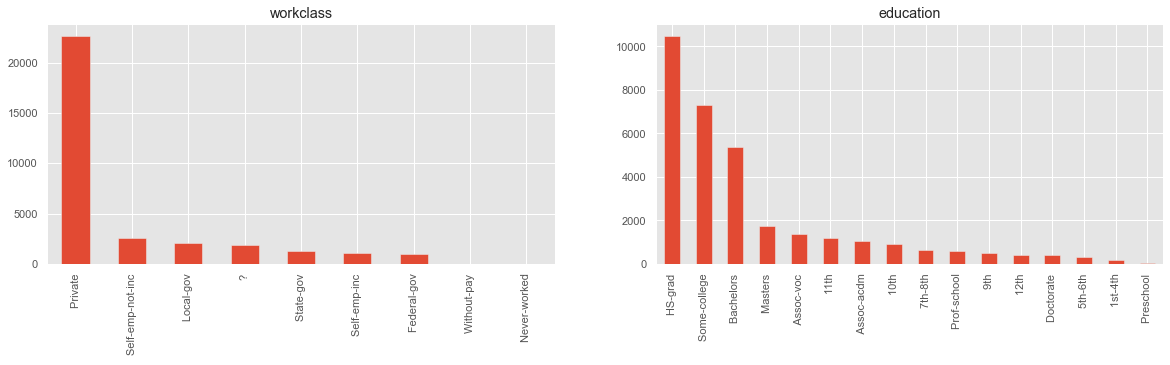

In [11]:
plt.figure(1)
plt.subplot(321) # bar plot with the number of loans for each category of home ownership
raw_data.worksalary_class.value_counts().plot.bar(figsize=(20,15), title= 'workclass')

plt.subplot(322)
raw_data.education.value_counts().plot.bar(title= 'education')



# plt.subplot(325) # bar plot with the number of borrowers within each category of loan purpose
# loan_data.purpose.value_counts().plot.bar(title= 'Loan Purpose')

# plt.subplot(326)
# loan_data.loan_status.value_counts().plot.bar(title= 'Status of the loan')

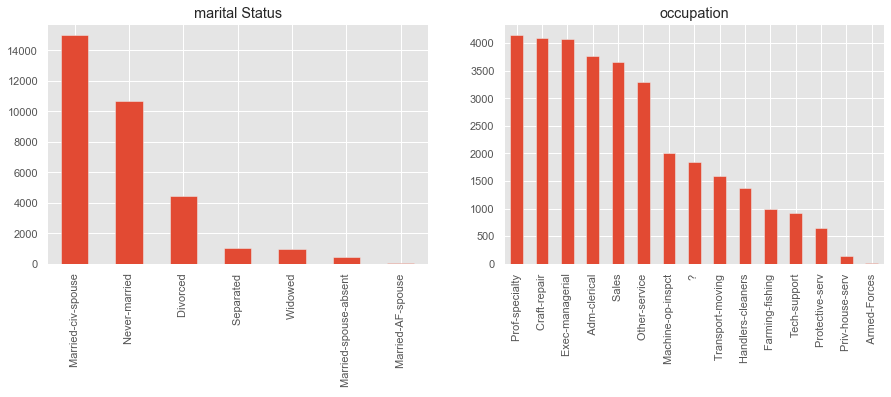

In [12]:
plt.figure(1)
plt.subplot(323)
raw_data.marital_status.value_counts().plot.bar(title= 'marital Status')


plt.subplot(324)
raw_data.occupation.value_counts().plot.bar(figsize=(15,15),title= 'occupation')

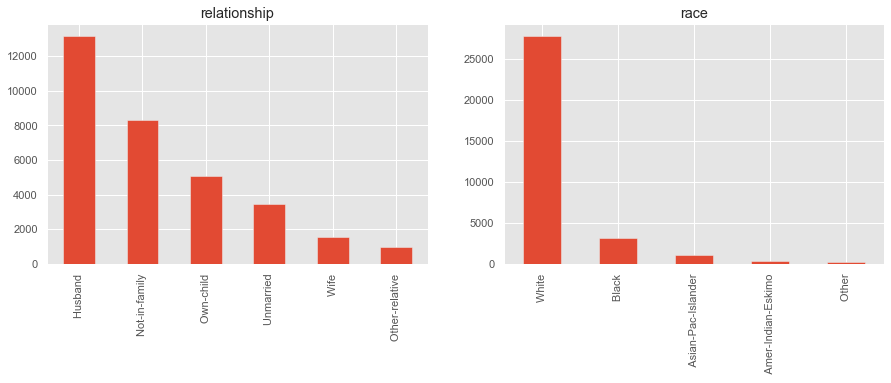

In [13]:
plt.figure(1)
plt.subplot(323)
raw_data.relationship.value_counts().plot.bar(title= 'relationship')


plt.subplot(324)
raw_data.race.value_counts().plot.bar(figsize=(15,15),title= 'race')



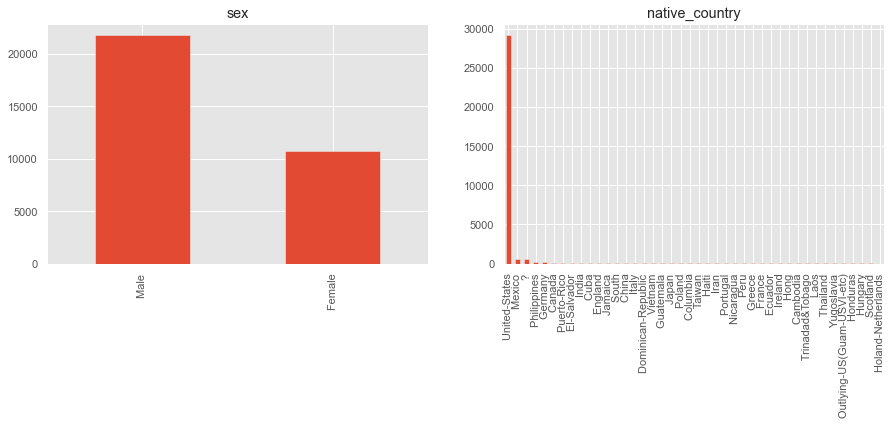

In [14]:
plt.subplot(323)
raw_data.sex.value_counts().plot.bar(title= 'sex')


plt.subplot(324)
raw_data.native_country.value_counts().plot.bar(figsize=(15,15), title= 'native_country')

In [15]:
def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

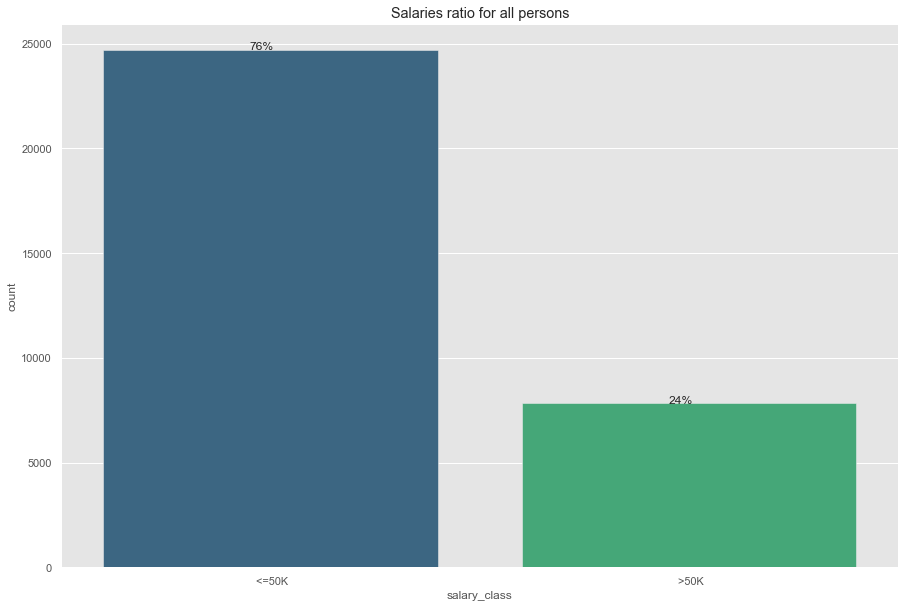

In [16]:
plt.figure(figsize=(15,10))
ax = sns.countplot( x=raw_data.salary_class , data= raw_data , palette='viridis')
ax.set_title('Salaries ratio for all persons')
percen(ax , raw_data.salary_class)

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

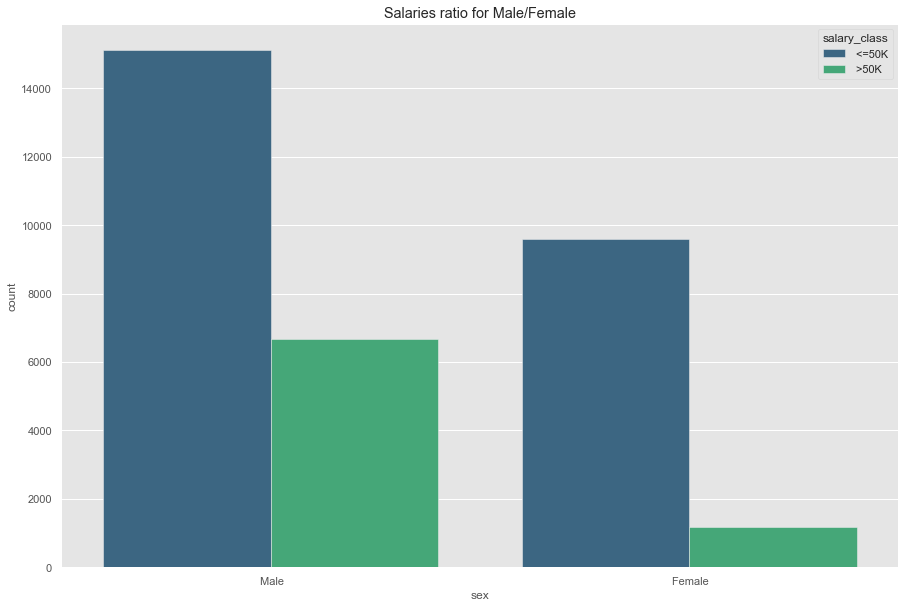

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data=raw_data, x='sex', hue='salary_class', palette='viridis').set_title('Salaries ratio for Male/Female')

## 1.2 Numeric Variables

### 1.2.1 Descriptive Statistics

In [18]:
## Numeric Features
num_vars = ds.structdata.get_num_feats(raw_data)
print(num_vars)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [19]:
# Basic Descriptive statistics
raw_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

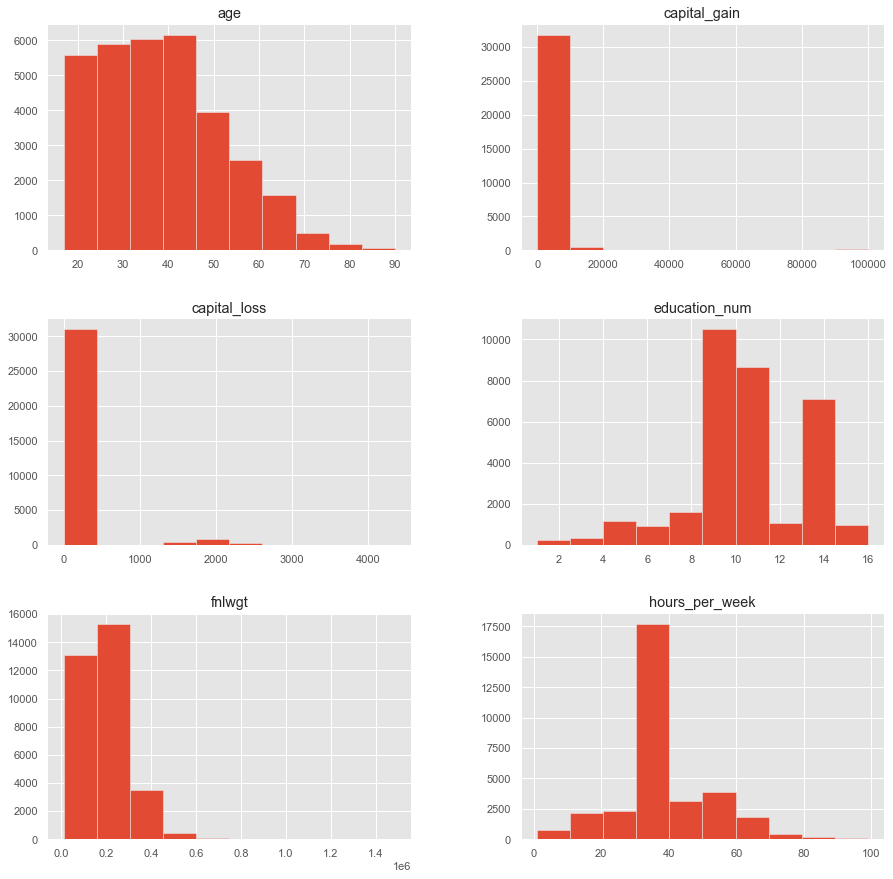

In [20]:
# Distribution of numeric variables
raw_data[num_vars].hist(figsize=(15,15))
plt.show()

## Outlier Detection

C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\akila\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

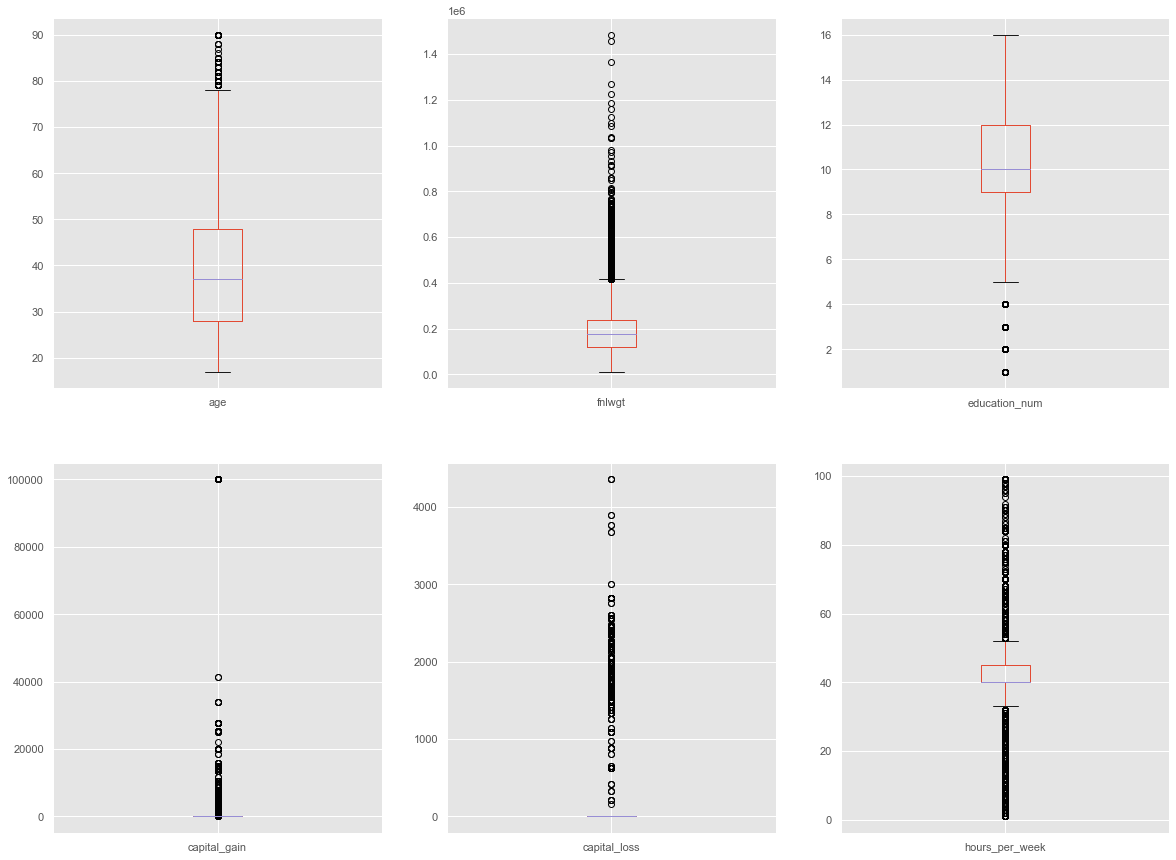

In [21]:
raw_data.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (2,3))
plt.show()

In [22]:
# Get count of outlier values in every column
def outlier_value_count(df):
    num_feats = ds.structdata.get_num_feats(df)
    Q1=df[num_feats].quantile(0.05)
    Q3=df[num_feats].quantile(0.95)
    IQR=Q3-Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    return ((df[num_feats] < lower_bound) | (df[num_feats] > upper_bound)).sum()


#Show outlier count in entire data
# Outlier value count of historical customer data
print("Count of Outliers")
outlier_value_count(raw_data)

Count of Outliers


age                  0
fnlwgt              20
education_num        0
capital_gain       707
capital_loss      1519
hours_per_week       0
dtype: int64

# Multivariate Analysis
## Correlation between Variables

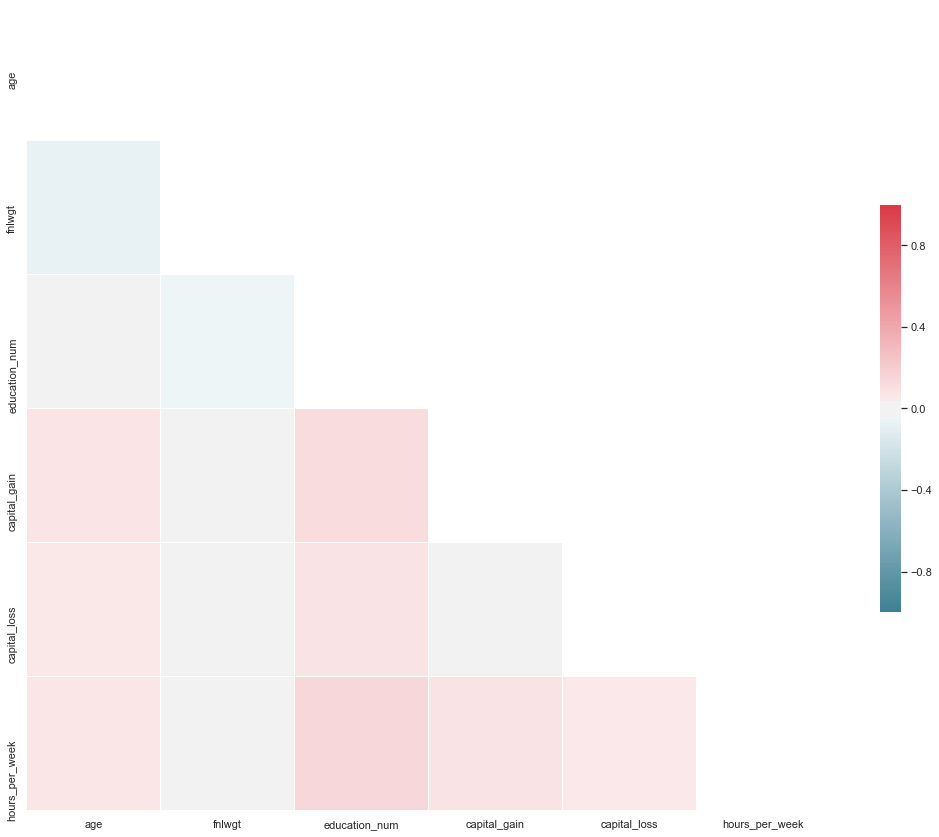

In [23]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = raw_data.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

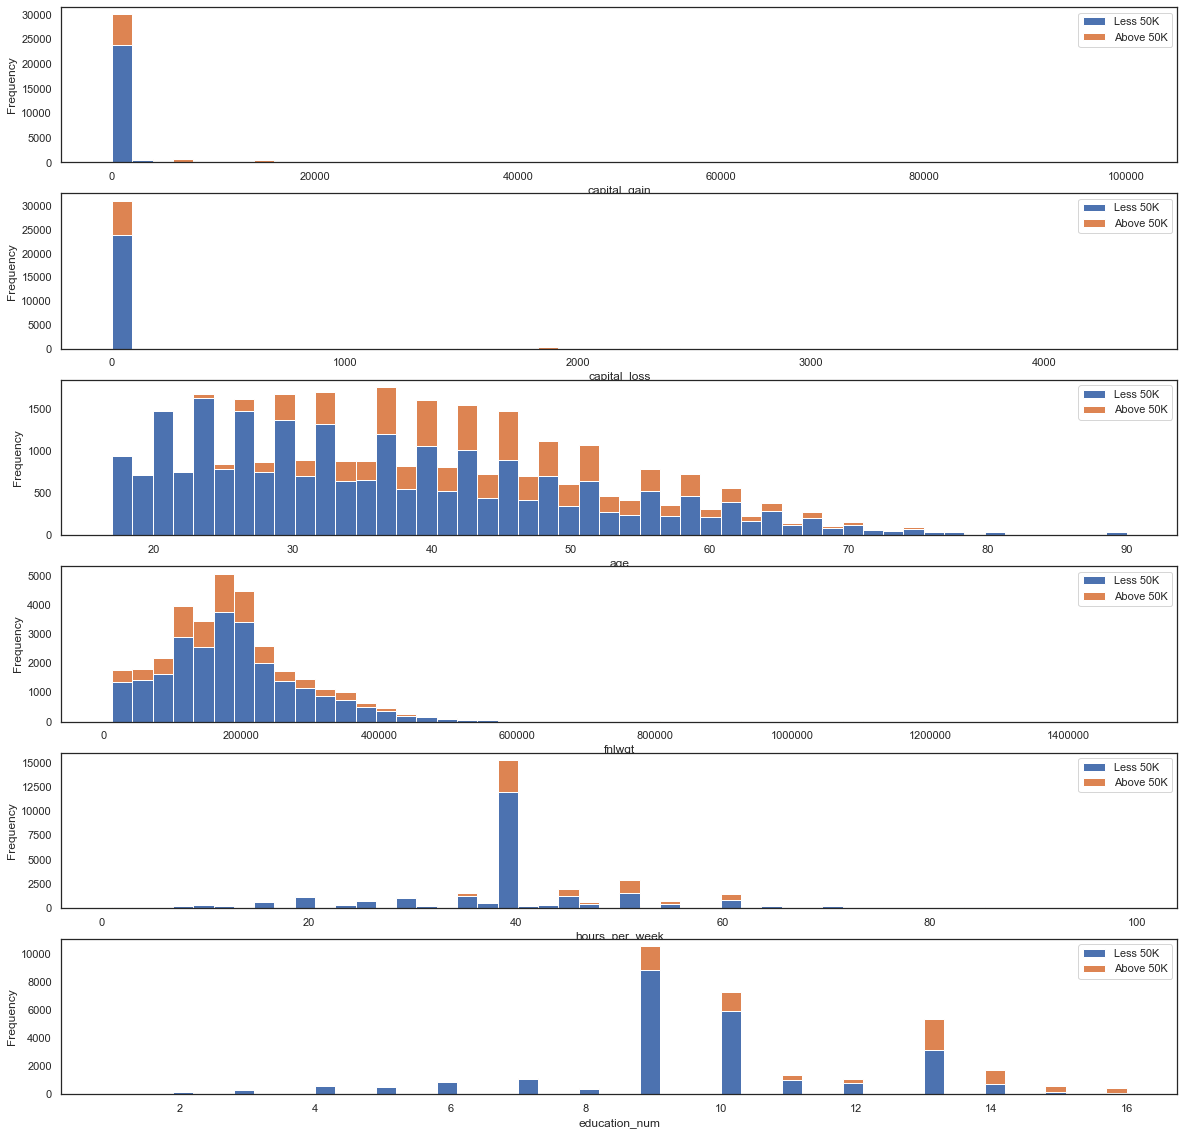

In [24]:
# Function to plot distributions
def plot_distributions(df,col,ax):
    data = pd.DataFrame({"Less 50K":df[df["salary_class"]==' <=50K'][col],
                     "Above 50K":df[df["salary_class"]==' >50K'][col]})
    data[["Less 50K","Above 50K"]].plot(kind='hist',bins=50,
                                 ax=ax,stacked=True)
    ax.set_xlabel(col)
    ax.ticklabel_format(style='plain',axis='x')
    
# Relationship between loan grade and interest rate and loan amount
fig,ax=plt.subplots(nrows=6,figsize=(20,20))
plot_distributions(raw_data,'capital_gain',ax[0])
plot_distributions(raw_data,'capital_loss',ax[1])
plot_distributions(raw_data,'age',ax[2])
plot_distributions(raw_data,'fnlwgt',ax[3])
plot_distributions(raw_data,'hours_per_week',ax[4])
plot_distributions(raw_data,'education_num',ax[5])

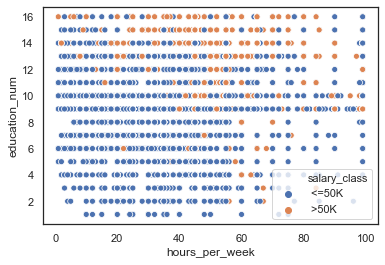

In [25]:
sns.scatterplot(x="hours_per_week", y="education_num",
              hue="salary_class",
              data=raw_data);

**FEW FINDINGS**

* Dimension of data is 32561 rows and 15 columns

* The Data types are consistent

* The data consists of 6 numerical features and 9 Categorical features

* The count of the number of records in each variable shows that all variables have 32561 rows. This implies that the data set is fairly complete but from experience, this is very unlikely and further investigation by printing out the different classes in each variable revealed that missing values are show as " ?". All data points with " ?" needs to be changed to NaN. 

* Printing out the categorical variables also revealed that whitespace preceeds every value so I need to strip off these whitespaces. 

* The maximum hours worked per week is 99 hours, minimum is 1 hour and on an average the hours worked per week is 40.437 hours.

* The maximun age is 90 years, minimum is 17 years and average is 38.58 years

* The cadinality of the native-country, worksalary_class, marital_status, education and occupation variables are very high so I need to explore options of reducing the cardinality or dropping these variables if need be.

* The dependent variable have two class so this will be a binary classification problem

* There is a class imbalance between the two classes so I need to explore methods of balancing the classes.
